In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Gradient Descent Parameters
alpha = learning_rate = 0.001
iterations = 1000

Like last time, generate synthetic date with $\beta_0 = 5$ and $\beta_1 = 3$. 1000 points should be fine.

In [3]:
x = np.random.randn(100)
y = 5 + 3 * x + np.random.randn(100)

In the real world, you do not know these beta values. Your goal is to find them! So, pretending you do not know $\beta_0 = 5$ and $\beta_1 = 3$, proceed as if you only observe x and y.

First, randomly guess $\beta_0$ and $\beta_1$, using the random operations in numpy.

In [4]:
# Initializing parameters (slope and intercept)
b1 = np.random.randn(1)  # Slope
b0 = np.random.randn(1)  # Intercept

In [12]:
print(b1,b0)

3.066231384927273 5.071434418254957


Write a function to compute the cost. This should be $\frac{1}{n} \sum ( y_{pred} - y )^2$. This is known as mean square loss.

In [5]:
def compute_cost(x, y, b1, b0):
    n = len(y)
    y_pred = b1 * x + b0
    cost = (1/n) * np.sum((y_pred - y)**2)
    return cost

We are now going to walk through one iteration of gradient descent.
* Using the existing guesses for $\beta_0$ and $\beta_1$, generate predictions for y
* Calculate the gradients for $\beta_0$ and $\beta_1$ then use it to update the existing $\beta$ values.
* Compute the cost.

In [6]:
# Code for one iteration.

n = len(y)
b1 = np.random.randn(1)  # Slope
b0 = np.random.randn(1)

y_pred = b1 * x + b0

# Calculate gradients
b1_gradient = (1/n) * np.sum(x * (y - y_pred))
b0_gradient = (1/n) * np.sum(y - y_pred)

# Update parameters
b1 = b1 - learning_rate * b1_gradient
b0 = b0 - learning_rate * b0_gradient

# Calculate and store cost
cost = compute_cost(x, y, b1, b0)
# cost_history.append(cost)

In [7]:
cost

np.float64(26.370515597010137)

In [8]:
n = len(y)
b1 = np.random.randn(1)  # Slope
b0 = np.random.randn(1)

b1
b0

array([0.11444582])

Write a for loop that iterates through the total iterations (1000). Within each loop, update $\beta_0$ and $\beta_1$.

Also, create an empty list that saves the cost each iteration, and two other lists for $\beta_0$ and $\beta_1$. You want to see that the loss is going down. To check this, print the loss every 100 iterations.

Iteration 0: Cost 8689.903601102576, b1: 93.16858881960577, b0: 24.095962746290773
Iteration 100: Cost 3.0280275764276054, b1: 4.475195473661888, b0: 5.218981866431448
Iteration 200: Cost 0.9826062841670141, b1: 3.0885561036958036, b0: 5.071194741495284
Iteration 300: Cost 0.9821014542848796, b1: 3.0665901383025416, b0: 5.071386839597958
Iteration 400: Cost 0.9821013225647994, b1: 3.06623723523368, b0: 5.0714329109436695
Iteration 500: Cost 0.9821013225283456, b1: 3.066231481755542, b0: 5.071434381250941
Iteration 600: Cost 0.9821013225283349, b1: 3.0662313865533655, b0: 5.071434417437724
Iteration 700: Cost 0.982101322528335, b1: 3.0662313849549565, b0: 5.071434418237916
Iteration 800: Cost 0.982101322528335, b1: 3.066231384927745, b0: 5.071434418254625
Iteration 900: Cost 0.9821013225283349, b1: 3.066231384927276, b0: 5.071434418254957


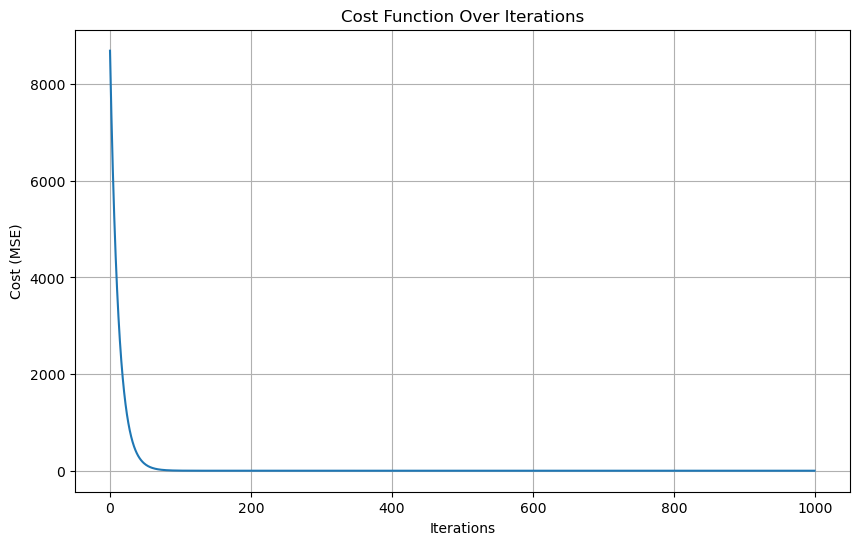

In [9]:
# Gradient Descent Function
def gradient_descent(x, y, learning_rate, iterations):
    n = len(y)
    
    b1 = np.random.randint(1,100)  # Slope
    b0 = np.random.randint(1,100) 
    
    cost_history = []
    b0_hist = []
    b1_hist = []
    
    for i in range(iterations):
        # Predict y values
        y_pred = b1 * x + b0
        
        # Calculate gradients
        b1_gradient = (1/n) * np.sum(x * (y_pred-y))
        b0_gradient = (1/n) * np.sum(y_pred-y)
        
        # Update parameters
        b1 = b1 - learning_rate * b1_gradient
        b0 = b0 - learning_rate * b0_gradient
        
        # Calculate and store cost
        cost = compute_cost(x, y, b1, b0)
        cost_history.append(cost)
        
        b1_hist.append(b1)
        b0_hist.append(b0)
        
        # Print progress every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}: Cost {cost}, b1: {b1}, b0: {b0}")
    
    return b1, b0, cost_history, b1_hist, b0_hist

# Run Gradient Descent
b1, b0, cost_history,b1_hist, b0_hist = gradient_descent(x, y,0.04, iterations)

# Plotting the cost function to visualize convergence
plt.figure(figsize=(10, 6))
plt.plot(cost_history)
plt.title("Cost Function Over Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.grid(True)
plt.show()

Plot the cost overtime. X-axis is the iteration, y-axis is the cost.

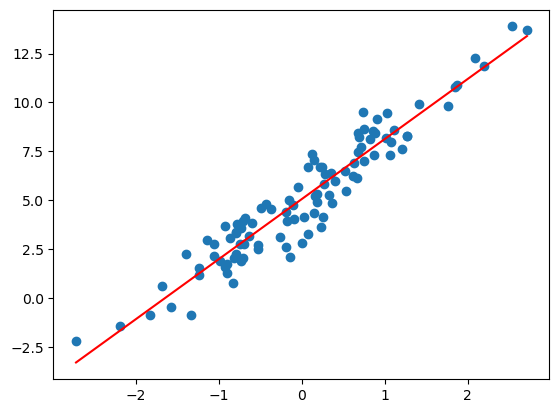

In [10]:
linear_fx = lambda x: b1*x + b0

ymin = linear_fx(x.min())
ymax = linear_fx(x.max())

plt.plot([x.min(),x.max()],
          [ymin, ymax], color="red")

plt.scatter(x,y)

Plot the evolution of the beta values.

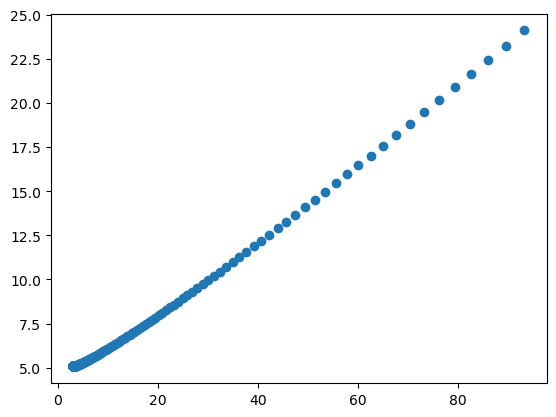

In [11]:
plt.scatter( b1_hist, b0_hist )